<a href="https://colab.research.google.com/github/ArmandOvanessians/Brain_Connectome/blob/master/Notebook_HW3_Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Low-rank Matrix Completion via Riemannian Optimization -- Numerical Experiments

For this problem we implement the three approaches for low-rank matrix completion described in problems 1-3 of Homework 3.

Please fill in the gaps in the code blocks below.

</span>$\color{red}{\text{Please write your own code.}}$



### Setting up

You may find it helpful to utilize the [Manopt toolbox](https://pymanopt.org/).
* Familiarize yourself with the available manifold classes in the API reference.
* Familiarize yourself with the avialable optimizers in the API reference.

In [1]:
# Install required packages.
!pip install pymanopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.3 MB/s eta 0:00:00


### (a) Implement manifold descriptors and related geometric tools.


In [117]:
import autograd.numpy as anp
import pymanopt
from pymanopt.manifolds import Euclidean, Product, Stiefel, FixedRankEmbedded

anp.random.seed(7)

# Parameters
m = 200 # matrix has size m x n
n = 500
r = 5 # matrix has rank r


In [13]:
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])

In [36]:
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel

In [51]:
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

In [ ]:
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

### (b) Generate test data

See homework set for specific instructions.

In [18]:
import numpy as np
def generate_test_data(m, n, r, k, seed: int = None):
    """
    Generate a rank-r matrix and a random observation mask of size k.

    Returns:
      M_true : (m×n) full rank-r matrix
      M_obs  : (m×n) observed entries = M_true * mask
      mask   : (m×n) binary matrix with exactly k ones
      obs_idx: length-k array of flat indices in [0, m*n)
    """
    if seed is not None:
        np.random.seed(seed)

    # Generating M1 and M2 with gaussian entries
    M1 = np.random.randn(m, r)
    M2 = np.random.randn(n, r)
    M_true = M1 @ M2.T
    # pick k amount of entries from the total M*N
    total = m * n
    obs_idx = np.random.choice(total, size=k, replace=False)

    # build the mask picking which elemtns we observe
    mask = np.zeros(total, dtype=float)
    mask[obs_idx] = 1.0
    mask = mask.reshape(m, n)

    # observed matrix
    M_obs = M_true * mask

    return M_true, M_obs, mask, obs_idx

In [19]:
from re import M
M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, 1000)

### (c) Use Riemannian Gradient Descent (with line search) to compute low-rank matrix completion with the three different approaches.

You may use the Manopt implementation of RGD or implement the algorithm yourself as an exercise.

In [55]:
import pymanopt.optimizers
from pymanopt.function import autograd
from pymanopt.optimizers import SteepestDescent
from pymanopt import Problem

In [67]:
# Approach 1

@pymanopt.function.autograd(manifold1)
def cost1(L, R):
    X = anp.dot(L, R.T)
    return 0.5 * anp.sum(((X - M_obs) * mask) ** 2)

problem1 = Problem(manifold=manifold1, cost=cost1)
optimizer = SteepestDescent()
result1 = optimizer.run(problem1)

print("Optimized cost:", result1.cost)

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +4.6959017069924685e+03    3.72984671e+02    
   2         +4.3364788985981404e+03    3.46250463e+02    
   3         +3.1067535029289734e+03    2.52275374e+02    
   4         +1.0443996116442277e+03    1.21056781e+02    
   5         +5.9130499127819394e+02    8.22026467e+01    
   6         +5.5453245282269995e+02    1.48554995e+02    
   7         +4.2461562055937156e+02    1.15029334e+02    
   8         +1.7044074019312490e+02    3.28366496e+01    
   9         +1.0315259498115383e+02    3.44370566e+01    
  10         +7.3142557214321329e+01    2.28140278e+01    
  11         +6.0266286265472814e+01    3.85307672e+01    
  12         +3.4692601598676283e+01    1.24454823e+01    
  13         +2.9111832697513570e+01    3.78043364e+01    
  14         +1.2914825618260785e+01    1.80200203e+01    
  15         +7.3716293424297632e+00    9.

In [72]:
# Approach 2

@pymanopt.function.autograd(manifold2)
def cost2(A,Z):
    #A, Z = point
    X_pred = anp.dot(A, Z.T)
    return 0.5 * anp.sum(((X_pred - M_obs) * mask) ** 2)

problem2 = Problem(manifold=manifold2, cost=cost2)

optimizer = SteepestDescent()
result2 = optimizer.run(problem2)

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +2.5493280480529806e+03    1.66284138e+02    
   2         +2.4005639398068924e+03    1.46290331e+02    
   3         +2.1940439813586845e+03    3.01051706e+01    
   4         +2.1854567612162491e+03    2.76242601e+01    
   5         +2.1783504910424449e+03    2.32826949e+01    
   6         +2.1726982788094415e+03    2.65879612e+01    
   7         +2.1707234409646285e+03    4.20519187e+01    
   8         +2.1642096794614440e+03    2.82211916e+01    
   9         +2.1637378294786104e+03    4.78786854e+01    
  10         +2.1619165671344349e+03    4.45474662e+01    
  11         +2.1557655853146803e+03    3.12590522e+01    
  12         +2.1526479413282595e+03    3.97515313e+01    
  13         +2.1441948597540527e+03    1.83503170e+01    
  14         +2.1372296949698743e+03    3.86621970e+01    
  15         +2.1307048531853934e+03    3.

In [70]:

@pymanopt.function.autograd(manifold=manifold3)
def cost3(U, s, Vt):
    # reconstruct X = U @ diag(s) @ Vt
    X_pred = U @ anp.diag(s) @ Vt
    # masked least–squares
    return 0.5 * anp.sum(((X_pred - M_obs) * mask) ** 2)

problem3 = Problem(manifold=manifold3, cost=cost3)
optimizer = SteepestDescent()
result3 = optimizer.run(problem3)

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +2.5314353589407142e+03    1.34519066e+01    
   2         +2.5197211359975968e+03    1.42316702e+01    
   3         +2.4711163808049846e+03    1.79023860e+01    
   4         +2.2750093729059226e+03    1.85254023e+01    
   5         +1.6484830667555545e+03    1.25632483e+01    
   6         +1.3918434819078118e+03    2.05420120e+01    
   7         +7.0593833221195723e+02    9.00491228e+00    
   8         +6.2284560849240484e+02    9.03687844e+00    
   9         +3.5732275734666382e+02    5.63972709e+00    
  10         +2.7467755520153918e+02    7.16736819e+00    
  11         +1.2645345710855179e+02    2.20072734e+00    
  12         +9.2215380048325301e+01    2.66739787e+00    
  13         +7.1923591578543636e+01    1.91781880e+00    
  14         +5.3236236762888993e+01    1.52034432e+00    
  15         +4.6972162599551005e+01    1.

### Plot your results for different parameter choices.

## Comparing Objective Function and Compute time over different observations K
- Utilized SVD to calculate initial guesses

- Initial Parmaters:
- Each point is a different observation k
# Parameters
- m = 200 # matrix has size m x n
- n = 500
- r = 5 # matrix has rank r

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
 1           +2.3607254223235755e+03    7.70139755e+01    
 2           +2.2853176786842578e+03    7.41577933e+01    
 3           +1.9986471767399321e+03    7.18131444e+01    
 4           +8.8454305621212336e+02    7.72276501e+01    
 5           +4.3043251617967928e+02    9.25557402e+01    
 6           +3.0234096321901228e+02    5.98124371e+01    
 7           +1.9500349705618348e+02    8.11769646e+01    
 8           +8.3552655474168020e+01    3.44002985e+01    
 9           +4.7683362052814019e+01    2.64835687e+01    
10           +4.1213115676085316e+01    2.67707405e+01    
11           +2.2613015311132543e+01    1.23951740e+01    
12           +1.7431355782653419e+01    1.56045958e+01    
13           +1.3094282160440876e+01    1.27231241e+01    
14           +1.1850565918545909e+01    1.58230571e+01    
15           +7.9807190689142065e+00    9.

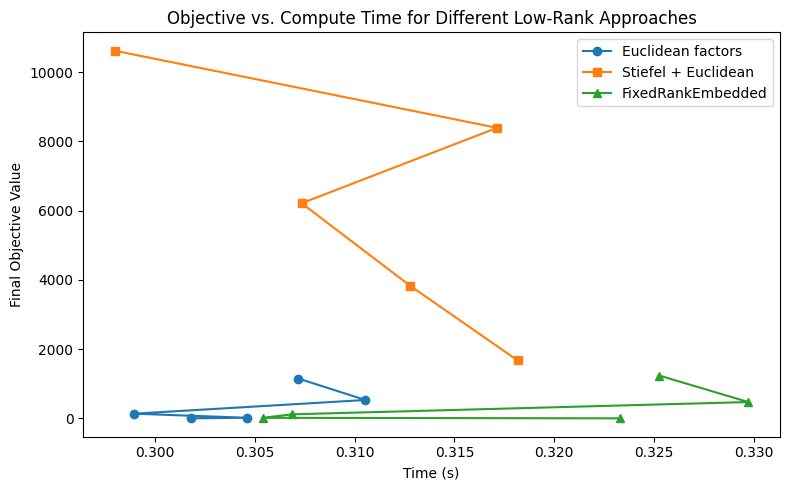

In [101]:
# Sweep over different numbers of observations
ks = np.linspace(1000, 5000, 5)
ks = np.round(ks).astype(int).tolist()
results = []

for k in ks:
    # regenerate data & update the globals
    M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, k, seed=42)

    # one shared initial guess via truncated SVD
    X0 = np.random.RandomState(1).randn(m, n)
    U_full, s_full, Vt_full = np.linalg.svd(X0, full_matrices=False)
    U0, s0, Vt0 = U_full[:, :r], s_full[:r], Vt_full[:r, :]
    sqrt_s = np.sqrt(s0)
    L0 = U0 * sqrt_s
    R0 = (Vt0.T) * sqrt_s

    optimizer = SteepestDescent(max_iterations=50)
    #Euclidean factors
    problem1 = Problem(manifold=manifold1, cost=cost1)
    start = time.time()
    result1 = optimizer.run(problem1, initial_point=(L0, R0))
    t1 = time.time() - start
    results.append(("Euclidean factors", k, result1.cost, t1))
    #Stiefel + Euclidean
    problem2 = Problem(manifold=manifold2, cost=cost2)
    start = time.time()
    result2 = optimizer.run(problem2, initial_point=(U0, R0))
    t2 = time.time() - start
    results.append(("Stiefel + Euclidean", k, result2.cost, t2))
    # Last
    problem3 = Problem(manifold=manifold3, cost=cost3)
    start = time.time()
    result3 = optimizer.run(problem3, initial_point=(U0, s0, Vt0))
    t3 = time.time() - start
    results.append(("FixedRankEmbedded", k, result3.cost, t3))
markers = {
    "Euclidean factors": "o",
    "Stiefel + Euclidean": "s",
    "FixedRankEmbedded": "^"
}

plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Final Objective Value")
plt.title("Objective vs. Compute Time for Different Low-Rank Approaches")
plt.legend()
plt.tight_layout()
plt.show()

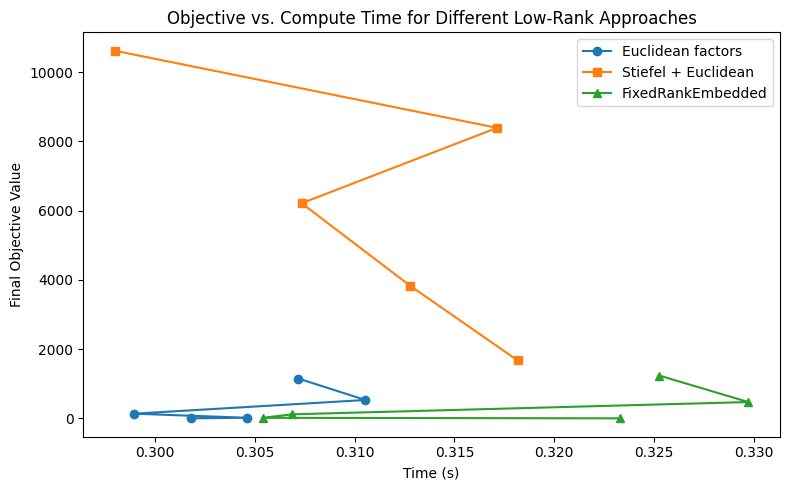

In [103]:
plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Final Objective Value")
plt.title("Objective vs. Compute Time for Different Low-Rank Approaches")
plt.legend()
plt.tight_layout()
plt.show()

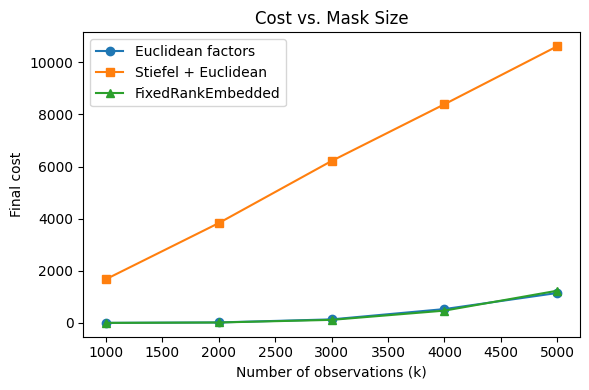

In [102]:
plt.figure(figsize=(6,4))
for name in markers:
    ks_   = [k for m_name, k, c, t in results if m_name == name]
    costs = [c for m_name, k, c, t in results if m_name == name]
    plt.plot(ks_, costs, marker=markers[name], label=name)
plt.xlabel("Number of observations (k)")
plt.ylabel("Final cost")
plt.title("Cost vs. Mask Size")
plt.legend()
plt.tight_layout()

### (d) Compare your results for the three different approaches.

As far as efficiency and accuracy both Fixed Rank Embedded and Euclidean factors beat stiefel + Euclidean by a long shot. Fixed Rank and Euclidean are often perform very similarly, but if you scroll down long enough (Big M and Big N) examples, Fixed Rank outperforms Euclidean, this is especially true in High Rank scenerios.

# (E)

It seems like larger rank models perform better, but take longer to optimize. This makes sense since the model essentially has more degrees of freedom making least squares easier to solve. As far as increasing M and N it take a lot longer to optimize.

# Trying Different Ranks

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
 1           +2.3607254223235755e+03    7.70139755e+01    
 2           +2.2853176786842578e+03    7.41577933e+01    
 3           +1.9986471767399321e+03    7.18131444e+01    
 4           +8.8454305621212336e+02    7.72276501e+01    
 5           +4.3043251617967928e+02    9.25557402e+01    
 6           +3.0234096321901228e+02    5.98124371e+01    
 7           +1.9500349705618348e+02    8.11769646e+01    
 8           +8.3552655474168020e+01    3.44002985e+01    
 9           +4.7683362052814019e+01    2.64835687e+01    
10           +4.1213115676085316e+01    2.67707405e+01    
11           +2.2613015311132543e+01    1.23951740e+01    
12           +1.7431355782653419e+01    1.56045958e+01    
13           +1.3094282160440876e+01    1.27231241e+01    
14           +1.1850565918545909e+01    1.58230571e+01    
15           +7.9807190689142065e+00    9.

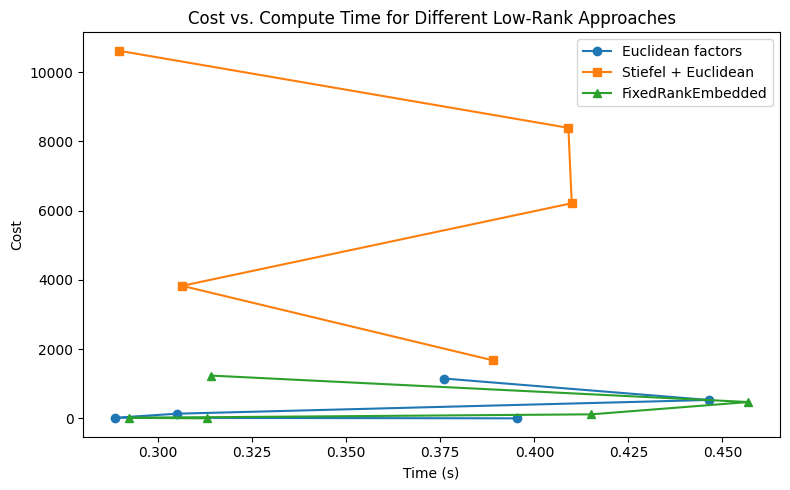

In [124]:

# Parameters
m = 200 # matrix has size m x n
n = 500
r = 5 # matrix has rank r

# Redefine manifolds w/ different paramters
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

# Sweep over different numbers of observations
ks = np.linspace(1000, 5000, 5)
ks = np.round(ks).astype(int).tolist()
results = []

for k in ks:
    # regenerate data & update the globals
    M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, k, seed=42)

    # one shared initial guess via truncated SVD
    X0 = np.random.RandomState(1).randn(m, n)
    U_full, s_full, Vt_full = np.linalg.svd(X0, full_matrices=False)
    U0, s0, Vt0 = U_full[:, :r], s_full[:r], Vt_full[:r, :]
    sqrt_s = np.sqrt(s0)
    L0 = U0 * sqrt_s
    R0 = (Vt0.T) * sqrt_s

    optimizer = SteepestDescent(max_iterations=50)
    #Euclidean factors
    problem1 = Problem(manifold=manifold1, cost=cost1)
    start = time.time()
    result1 = optimizer.run(problem1, initial_point=(L0, R0))
    t1 = time.time() - start
    results.append(("Euclidean factors", k, result1.cost, t1))
    #Stiefel + Euclidean
    problem2 = Problem(manifold=manifold2, cost=cost2)
    start = time.time()
    result2 = optimizer.run(problem2, initial_point=(U0, R0))
    t2 = time.time() - start
    results.append(("Stiefel + Euclidean", k, result2.cost, t2))
    # Last
    problem3 = Problem(manifold=manifold3, cost=cost3)
    start = time.time()
    result3 = optimizer.run(problem3, initial_point=(U0, s0, Vt0))
    t3 = time.time() - start
    results.append(("FixedRankEmbedded", k, result3.cost, t3))
markers = {
    "Euclidean factors": "o",
    "Stiefel + Euclidean": "s",
    "FixedRankEmbedded": "^"
}

plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Cost")
plt.title("Cost vs. Compute Time for Different Low-Rank Approaches")
plt.legend()
plt.tight_layout()
plt.show()

# Medium Rank Test

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
 1           +7.8517222925904334e+03    2.35911525e+02    
 2           +7.6184919964772162e+03    2.30901536e+02    
 3           +6.7181045155960355e+03    2.19914253e+02    
 4           +3.2755068716565775e+03    2.17935759e+02    
 5           +8.4172685908901917e+02    1.42342195e+02    
 6           +3.3118340331115564e+02    9.79888860e+01    
 7           +1.0041160577051514e+02    5.90787001e+01    
 8           +8.4322668929573268e+01    6.07815366e+01    
 9           +3.3109010986219666e+01    3.55156451e+01    
10           +1.0721210174315910e+01    1.58878485e+01    
11           +5.5799965736539940e+00    1.08401851e+01    
12           +2.9281507173005399e+00    7.27874811e+00    
13           +1.6394852408164902e+00    5.77207621e+00    
14           +1.4565793985006417e+00    8.94094456e+00    
15           +8.5459274187860490e-01    5.

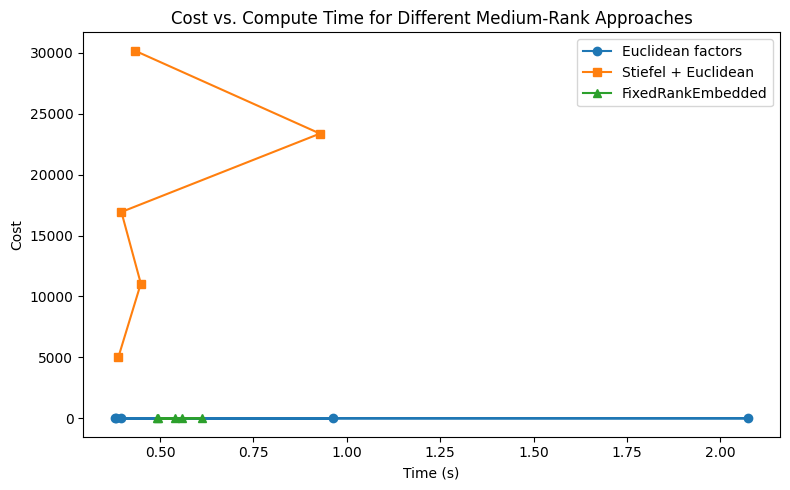

In [127]:

# Parameters
m = 200 # matrix has size m x n
n = 500
r = 15 # matrix has rank r

# Redefine manifolds w/ different paramters
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

# Sweep over different numbers of observations
ks = np.linspace(1000, 5000, 5)
ks = np.round(ks).astype(int).tolist()
results = []

for k in ks:
    # regenerate data & update the globals
    M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, k, seed=42)

    # one shared initial guess via truncated SVD
    X0 = np.random.RandomState(1).randn(m, n)
    U_full, s_full, Vt_full = np.linalg.svd(X0, full_matrices=False)
    U0, s0, Vt0 = U_full[:, :r], s_full[:r], Vt_full[:r, :]
    sqrt_s = np.sqrt(s0)
    L0 = U0 * sqrt_s
    R0 = (Vt0.T) * sqrt_s

    optimizer = SteepestDescent(max_iterations=50)
    #Euclidean factors
    problem1 = Problem(manifold=manifold1, cost=cost1)
    start = time.time()
    result1 = optimizer.run(problem1, initial_point=(L0, R0))
    t1 = time.time() - start
    results.append(("Euclidean factors", k, result1.cost, t1))
    #Stiefel + Euclidean
    problem2 = Problem(manifold=manifold2, cost=cost2)
    start = time.time()
    result2 = optimizer.run(problem2, initial_point=(U0, R0))
    t2 = time.time() - start
    results.append(("Stiefel + Euclidean", k, result2.cost, t2))
    # Last
    problem3 = Problem(manifold=manifold3, cost=cost3)
    start = time.time()
    result3 = optimizer.run(problem3, initial_point=(U0, s0, Vt0))
    t3 = time.time() - start
    results.append(("FixedRankEmbedded", k, result3.cost, t3))
markers = {
    "Euclidean factors": "o",
    "Stiefel + Euclidean": "s",
    "FixedRankEmbedded": "^"
}

plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Cost")
plt.title("Cost vs. Compute Time for Different Medium-Rank Approaches")
plt.legend()
plt.tight_layout()
plt.show()

## For High Rank approaches

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
 1           +2.5373129063778368e+04    7.35622255e+02    
 2           +2.4643568731395320e+04    7.23866254e+02    
 3           +2.1812166639398478e+04    6.86198929e+02    
 4           +1.1465896720396762e+04    6.04666129e+02    
 5           +3.4018242871677294e+03    8.01124908e+02    
 6           +2.4776783884423062e+03    3.16932789e+02    
 7           +5.3519001154605132e+02    2.20642993e+02    
 8           +4.1721304489529508e+01    6.29759101e+01    
 9           +2.3950266536126382e+01    5.60586056e+01    
10           +7.4722447495693771e+00    2.90256100e+01    
11           +8.7739423755245527e-01    8.20032319e+00    
12           +3.9954691240707335e-01    5.44879033e+00    
13           +3.2140714087966710e-01    5.96975175e+00    
14           +9.9223328913484649e-02    2.61057079e+00    
15           +7.8785858595956215e-02    2.

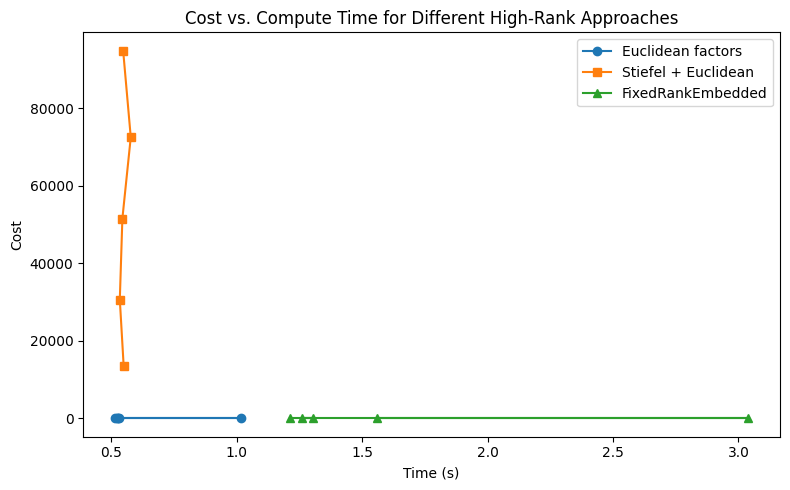

In [128]:

# Parameters
m = 200 # matrix has size m x n
n = 500
r = 50 # matrix has rank r

# Redefine manifolds w/ different paramters
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

# Sweep over different numbers of observations
ks = np.linspace(1000, 5000, 5)
ks = np.round(ks).astype(int).tolist()
results = []

for k in ks:
    # regenerate data & update the globals
    M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, k, seed=42)

    # one shared initial guess via truncated SVD
    X0 = np.random.RandomState(1).randn(m, n)
    U_full, s_full, Vt_full = np.linalg.svd(X0, full_matrices=False)
    U0, s0, Vt0 = U_full[:, :r], s_full[:r], Vt_full[:r, :]
    sqrt_s = np.sqrt(s0)
    L0 = U0 * sqrt_s
    R0 = (Vt0.T) * sqrt_s

    optimizer = SteepestDescent(max_iterations=50)
    #Euclidean factors
    problem1 = Problem(manifold=manifold1, cost=cost1)
    start = time.time()
    result1 = optimizer.run(problem1, initial_point=(L0, R0))
    t1 = time.time() - start
    results.append(("Euclidean factors", k, result1.cost, t1))
    #Stiefel + Euclidean
    problem2 = Problem(manifold=manifold2, cost=cost2)
    start = time.time()
    result2 = optimizer.run(problem2, initial_point=(U0, R0))
    t2 = time.time() - start
    results.append(("Stiefel + Euclidean", k, result2.cost, t2))
    # Last
    problem3 = Problem(manifold=manifold3, cost=cost3)
    start = time.time()
    result3 = optimizer.run(problem3, initial_point=(U0, s0, Vt0))
    t3 = time.time() - start
    results.append(("FixedRankEmbedded", k, result3.cost, t3))
markers = {
    "Euclidean factors": "o",
    "Stiefel + Euclidean": "s",
    "FixedRankEmbedded": "^"
}

plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Cost")
plt.title("Cost vs. Compute Time for Different High-Rank Approaches")
plt.legend()
plt.tight_layout()
plt.show()

# Trying different M

## Small M

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
 1           +2.4225599464827283e+03    1.21669631e+02    
 2           +2.3041491766687791e+03    1.15852663e+02    
 3           +1.8622591567779787e+03    1.09491177e+02    
 4           +7.7837822658726179e+02    1.69235008e+02    
 5           +6.7766034364299230e+02    9.03575780e+01    
 6           +3.6741005090212485e+02    6.04860663e+01    
 7           +1.4590724016766904e+02    4.74489705e+01    
 8           +9.5305909279229880e+01    3.07602693e+01    
 9           +8.8298693663079234e+01    5.77559436e+01    
10           +6.4424282878159119e+01    4.09993107e+01    
11           +5.6095879261710387e+01    4.47804303e+01    
12           +3.4127929052704594e+01    1.83646962e+01    
13           +2.7396765186961776e+01    2.02120168e+01    
14           +2.6960553744301677e+01    2.82605988e+01    
15           +2.5290849539964597e+01    2.

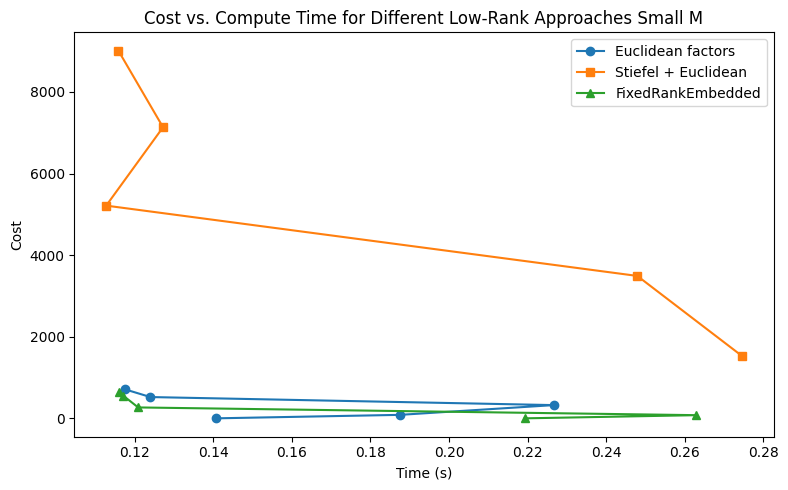

In [131]:

# Parameters
m = 50 # matrix has size m x n
n = 500
r = 5 # matrix has rank r

# Redefine manifolds w/ different paramters
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

# Sweep over different numbers of observations
ks = np.linspace(1000, 5000, 5)
ks = np.round(ks).astype(int).tolist()
results = []

for k in ks:
    # regenerate data & update the globals
    M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, k, seed=42)

    # one shared initial guess via truncated SVD
    X0 = np.random.RandomState(1).randn(m, n)
    U_full, s_full, Vt_full = np.linalg.svd(X0, full_matrices=False)
    U0, s0, Vt0 = U_full[:, :r], s_full[:r], Vt_full[:r, :]
    sqrt_s = np.sqrt(s0)
    L0 = U0 * sqrt_s
    R0 = (Vt0.T) * sqrt_s

    optimizer = SteepestDescent(max_iterations=50)
    #Euclidean factors
    problem1 = Problem(manifold=manifold1, cost=cost1)
    start = time.time()
    result1 = optimizer.run(problem1, initial_point=(L0, R0))
    t1 = time.time() - start
    results.append(("Euclidean factors", k, result1.cost, t1))
    #Stiefel + Euclidean
    problem2 = Problem(manifold=manifold2, cost=cost2)
    start = time.time()
    result2 = optimizer.run(problem2, initial_point=(U0, R0))
    t2 = time.time() - start
    results.append(("Stiefel + Euclidean", k, result2.cost, t2))
    # Last
    problem3 = Problem(manifold=manifold3, cost=cost3)
    start = time.time()
    result3 = optimizer.run(problem3, initial_point=(U0, s0, Vt0))
    t3 = time.time() - start
    results.append(("FixedRankEmbedded", k, result3.cost, t3))
markers = {
    "Euclidean factors": "o",
    "Stiefel + Euclidean": "s",
    "FixedRankEmbedded": "^"
}

plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Cost")
plt.title("Cost vs. Compute Time for Different Low-Rank Approaches Small M")
plt.legend()
plt.tight_layout()
plt.show()

# Big M

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
 1           +2.5350806845598763e+03    6.38575969e+01    
 2           +2.4721065780230042e+03    6.24569025e+01    
 3           +2.2232601818269209e+03    6.58640163e+01    
 4           +1.2359844979003001e+03    1.13888041e+02    
 5           +7.0670338171458138e+02    1.10761173e+02    
 6           +5.1266492381039359e+02    9.62269101e+01    
 7           +2.2178119066025036e+02    5.00077281e+01    
 8           +1.1948221054337237e+02    4.49601767e+01    
 9           +1.0012933080097770e+02    5.47573953e+01    
10           +5.3728746915549827e+01    2.21684207e+01    
11           +3.5734868913053354e+01    2.10622283e+01    
12           +2.9721397306608623e+01    1.89530596e+01    
13           +1.9392013373655391e+01    1.28931577e+01    
14           +1.5659568184248371e+01    1.07749706e+01    
15           +1.2360683233798820e+01    9.

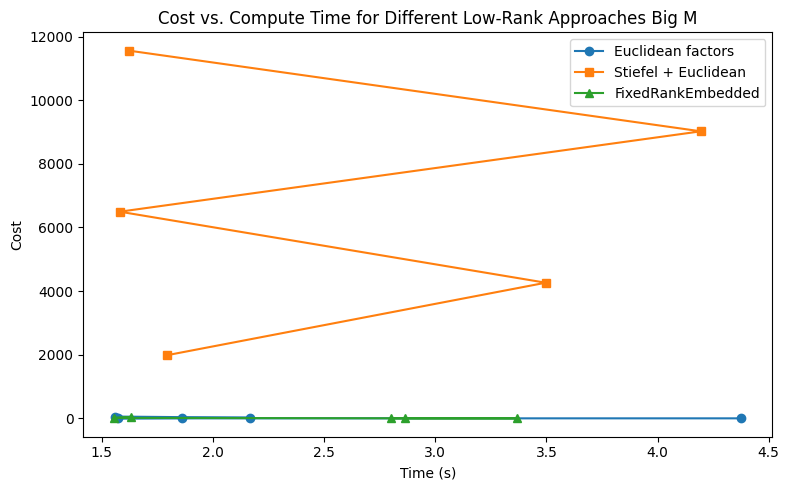

In [134]:

# Parameters
m = 1000 # matrix has size m x n
n = 500
r = 5 # matrix has rank r

# Redefine manifolds w/ different paramters
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

# Sweep over different numbers of observations
ks = np.linspace(1000, 5000, 5)
ks = np.round(ks).astype(int).tolist()
results = []

for k in ks:
    # regenerate data & update the globals
    M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, k, seed=42)

    # one shared initial guess via truncated SVD
    X0 = np.random.RandomState(1).randn(m, n)
    U_full, s_full, Vt_full = np.linalg.svd(X0, full_matrices=False)
    U0, s0, Vt0 = U_full[:, :r], s_full[:r], Vt_full[:r, :]
    sqrt_s = np.sqrt(s0)
    L0 = U0 * sqrt_s
    R0 = (Vt0.T) * sqrt_s

    optimizer = SteepestDescent(max_iterations=50)
    #Euclidean factors
    problem1 = Problem(manifold=manifold1, cost=cost1)
    start = time.time()
    result1 = optimizer.run(problem1, initial_point=(L0, R0))
    t1 = time.time() - start
    results.append(("Euclidean factors", k, result1.cost, t1))
    #Stiefel + Euclidean
    problem2 = Problem(manifold=manifold2, cost=cost2)
    start = time.time()
    result2 = optimizer.run(problem2, initial_point=(U0, R0))
    t2 = time.time() - start
    results.append(("Stiefel + Euclidean", k, result2.cost, t2))
    # Last
    problem3 = Problem(manifold=manifold3, cost=cost3)
    start = time.time()
    result3 = optimizer.run(problem3, initial_point=(U0, s0, Vt0))
    t3 = time.time() - start
    results.append(("FixedRankEmbedded", k, result3.cost, t3))
markers = {
    "Euclidean factors": "o",
    "Stiefel + Euclidean": "s",
    "FixedRankEmbedded": "^"
}

plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Cost")
plt.title("Cost vs. Compute Time for Different Low-Rank Approaches Big M")
plt.legend()
plt.tight_layout()
plt.show()

## Big N

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
 1           +2.1584533269708004e+03    7.44860773e+01    
 2           +2.0849394939077611e+03    7.28896380e+01    
 3           +1.7967373437572865e+03    7.42004841e+01    
 4           +7.8316327995698475e+02    9.25605383e+01    
 5           +7.1234245473513056e+02    1.76007531e+02    
 6           +4.8402090075982136e+02    1.13108434e+02    
 7           +2.8323511939956978e+02    6.13506180e+01    
 8           +1.5329518405215896e+02    5.70641276e+01    
 9           +9.8734833811335179e+01    4.12571094e+01    
10           +3.2291323037878549e+01    1.37742962e+01    
11           +1.6263801815075354e+01    1.48351017e+01    
12           +9.6548311385019474e+00    9.08888131e+00    
13           +6.9850594401046617e+00    7.73260631e+00    
14           +5.2530698809282841e+00    8.13062437e+00    
15           +3.6352208418330534e+00    4.

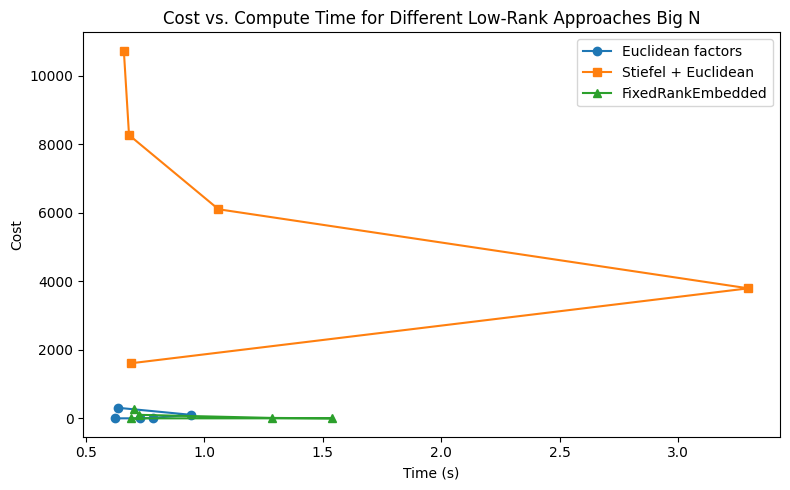

In [135]:

# Parameters
m = 200 # matrix has size m x n
n = 1000
r = 5 # matrix has rank r

# Redefine manifolds w/ different paramters
# Manifold 1: Product of linear spaces
manifold1 = Product([Euclidean(m, r), Euclidean(n, r)])
# Manifold 2: Product of Stiefel manifold and linear space
manifold2  = Product([Stiefel(m, r), Euclidean(n, r)]) # Swapped r and m in Stiefel
# Manifold 3: Manifold of fixed-rank matrices
manifold3 = FixedRankEmbedded(m, n, r)

# Sweep over different numbers of observations
ks = np.linspace(1000, 5000, 5)
ks = np.round(ks).astype(int).tolist()
results = []

for k in ks:
    # regenerate data & update the globals
    M_true, M_obs, mask, obs_idx = generate_test_data(m, n, r, k, seed=42)

    # one shared initial guess via truncated SVD
    X0 = np.random.RandomState(1).randn(m, n)
    U_full, s_full, Vt_full = np.linalg.svd(X0, full_matrices=False)
    U0, s0, Vt0 = U_full[:, :r], s_full[:r], Vt_full[:r, :]
    sqrt_s = np.sqrt(s0)
    L0 = U0 * sqrt_s
    R0 = (Vt0.T) * sqrt_s

    optimizer = SteepestDescent(max_iterations=50)
    #Euclidean factors
    problem1 = Problem(manifold=manifold1, cost=cost1)
    start = time.time()
    result1 = optimizer.run(problem1, initial_point=(L0, R0))
    t1 = time.time() - start
    results.append(("Euclidean factors", k, result1.cost, t1))
    #Stiefel + Euclidean
    problem2 = Problem(manifold=manifold2, cost=cost2)
    start = time.time()
    result2 = optimizer.run(problem2, initial_point=(U0, R0))
    t2 = time.time() - start
    results.append(("Stiefel + Euclidean", k, result2.cost, t2))
    # Last
    problem3 = Problem(manifold=manifold3, cost=cost3)
    start = time.time()
    result3 = optimizer.run(problem3, initial_point=(U0, s0, Vt0))
    t3 = time.time() - start
    results.append(("FixedRankEmbedded", k, result3.cost, t3))
markers = {
    "Euclidean factors": "o",
    "Stiefel + Euclidean": "s",
    "FixedRankEmbedded": "^"
}

plt.figure(figsize=(8, 5))
for method in markers:
    times = [t for m_name, k, c, t in results if m_name == method]
    costs = [c for m_name, k, c, t in results if m_name == method]
    plt.plot(times, costs, marker=markers[method], linestyle='-', label=method)

plt.xlabel("Time (s)")
plt.ylabel("Cost")
plt.title("Cost vs. Compute Time for Different Low-Rank Approaches Big N")
plt.legend()
plt.tight_layout()
plt.show()

## Big N